In [3]:
import pandas as pd
import os

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 35})
op_yield = 40 # 40 op /kev


In [5]:
dir_in = os.path.join("..", "Data", "cutROI")
new_file = "output2eROI_all_wt_ops.csv"
muons = pd.read_csv(os.path.join(dir_in, new_file), index_col=False)
muons = muons[muons.energydeposition > 0]

In [6]:
muons["OPcounter"] = muons.energydeposition * op_yield * muons.OPs
muons["energydetected"] = muons.OPcounter / op_yield

In [8]:
# Load Ar39 data
dir_in = os.path.join("..", "Data", "ar39")
filename = "all_ar39.csv"

ar39 = pd.read_csv(os.path.join(dir_in, filename), index_col=False)
ar39.time = ar39.time.astype("float")
ar39["sec"] = ar39.time / 1000000000    # add field for time in seconds
ar39["OPcounter"] = ar39.energydeposition * op_yield * ar39.detectionefficiency
ar39["energydetected"] = ar39.OPcounter / op_yield
ar39 = ar39.sort_values("time")

In [9]:
ar39.energydetected.describe()

count    2.185013e+06
mean     9.111709e-01
std      2.438582e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.883654e-04
max      3.002086e+01
Name: energydetected, dtype: float64

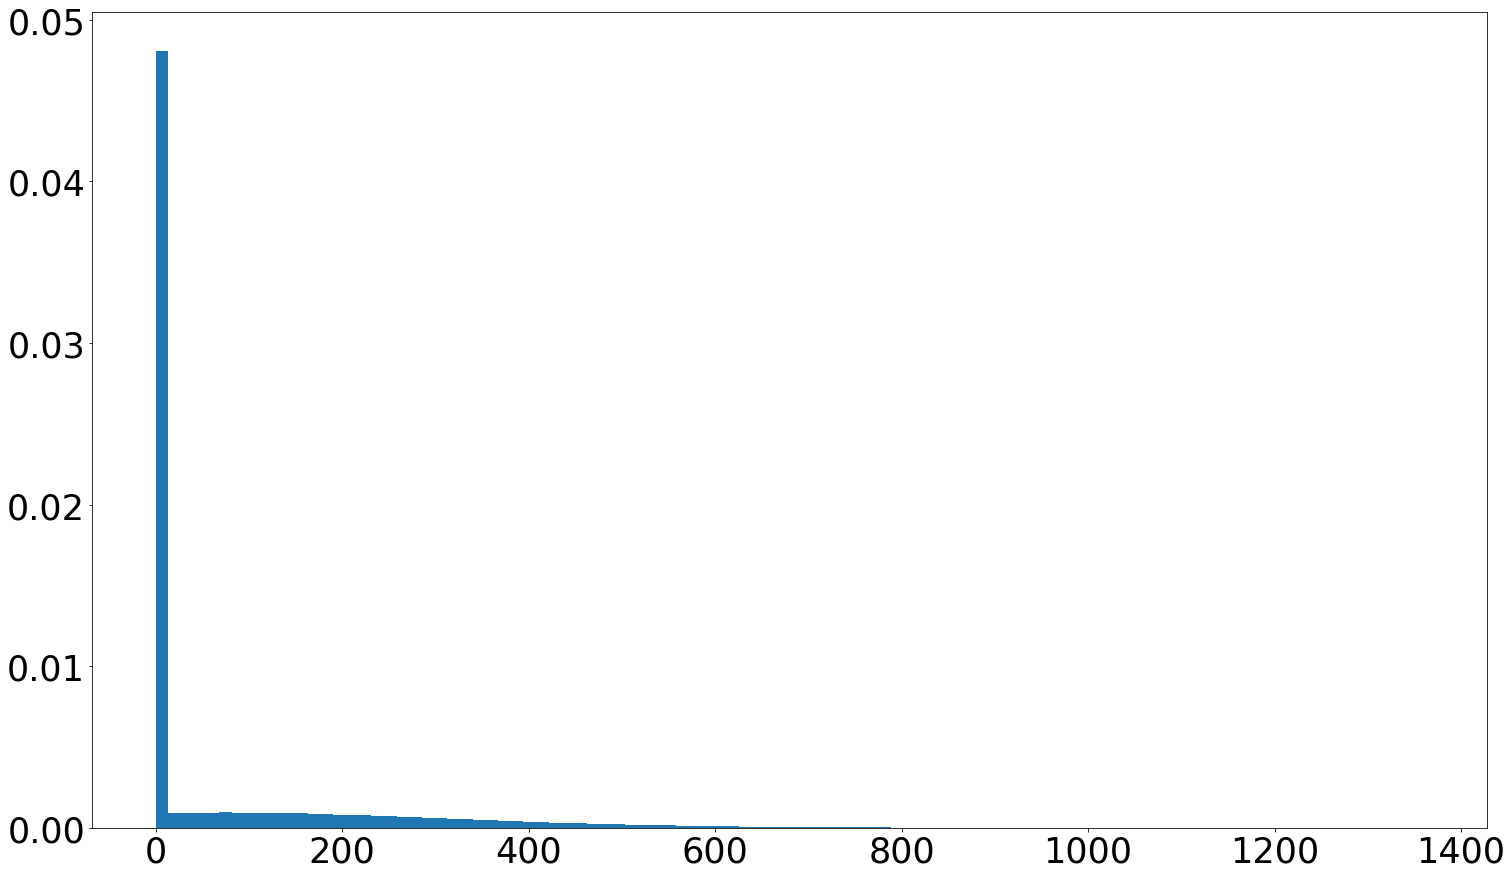

count    975465.000000
mean         81.639842
std         148.051538
min           0.000000
25%           0.000000
50%           0.000000
75%         115.857852
max        1359.902363
Name: OPcounter, dtype: float64

In [10]:
bins = np.linspace(0, 500, 100)
bins=100
#plt.hist(ar39.groupby("eventnumber").energydeposition.sum(), bins=bins, density=True)
plt.hist(ar39.groupby("eventnumber").OPcounter.sum(), bins=bins, density=True)
plt.show()

ar39.groupby("eventnumber").OPcounter.sum().describe()

In [11]:
muons_gb = muons.groupby("eventnumber").energydeposition.sum()
ar39_gb = ar39.groupby("eventnumber").energydeposition.sum()

In [12]:
ar39_11k = ar39_gb.iloc[:len(muons_gb)]

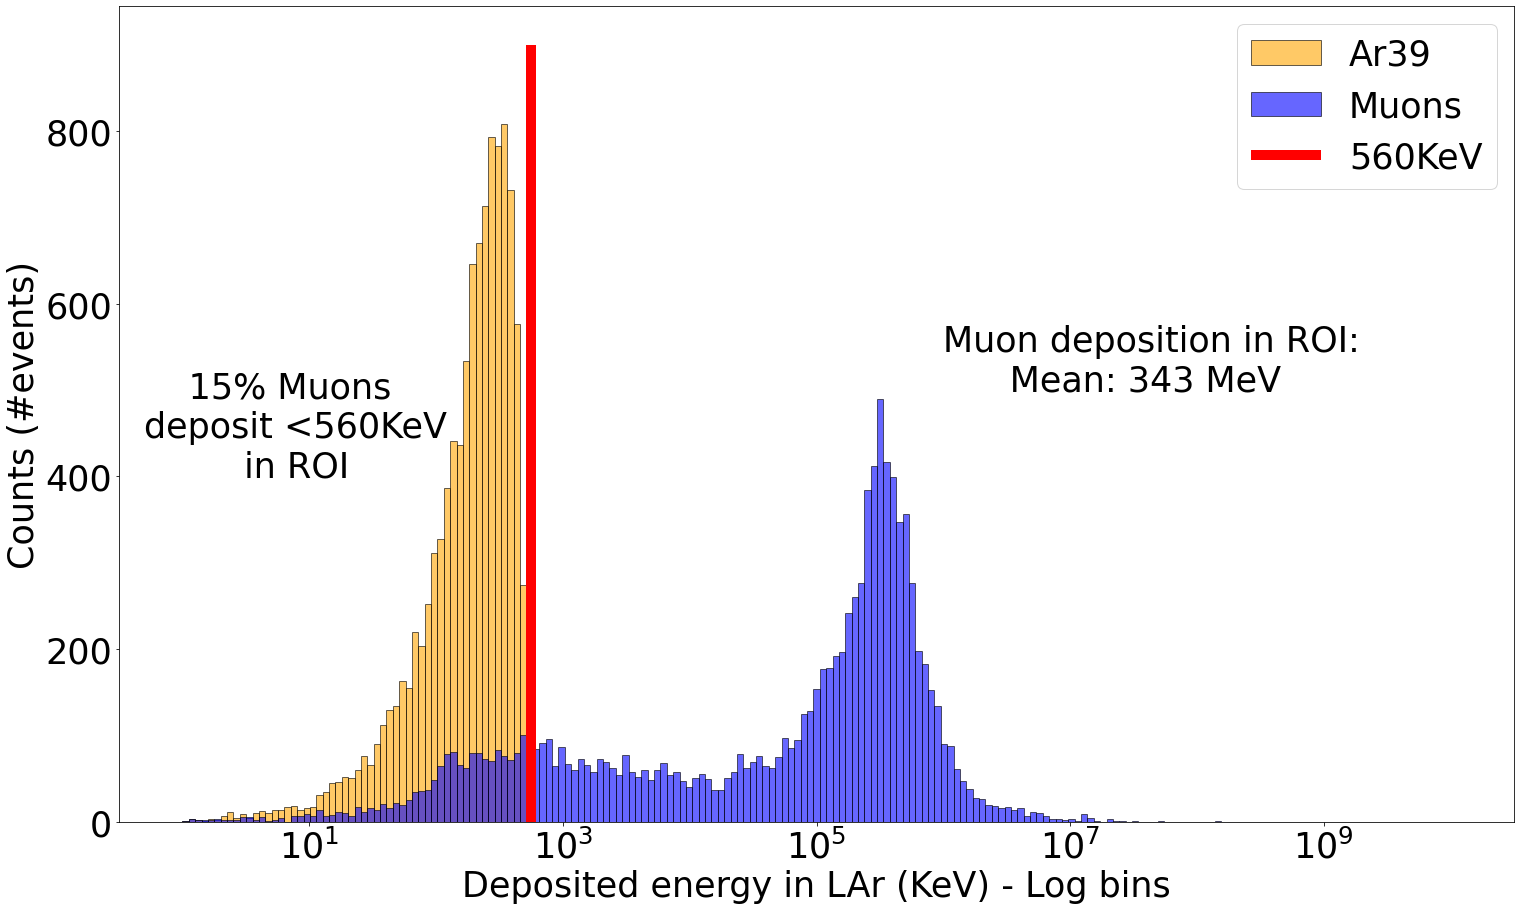

In [13]:
bins = np.logspace(0, 10, 200)
alpha = 0.6
plt.hist(ar39_11k, bins=bins, alpha=alpha, edgecolor='k', color='orange', label="Ar39")
plt.hist(muons_gb, bins=bins, alpha=alpha, edgecolor='k', color='blue', label="Muons")
plt.xscale("log")
plt.vlines(560, 0, 900, color='r', linewidth=10, label="560KeV")
plt.legend()
plt.xlabel("Deposited energy in LAr (KeV) - Log bins")
plt.ylabel("Counts (#events)")
plt.text(10**6, 500, "Muon deposition in ROI:\n      Mean: {:.0f} MeV".format(muons_gb.describe()['mean']/1000))
plt.text(.5, 400, "    15% Muons\ndeposit <560KeV\n         in ROI")
plt.show()

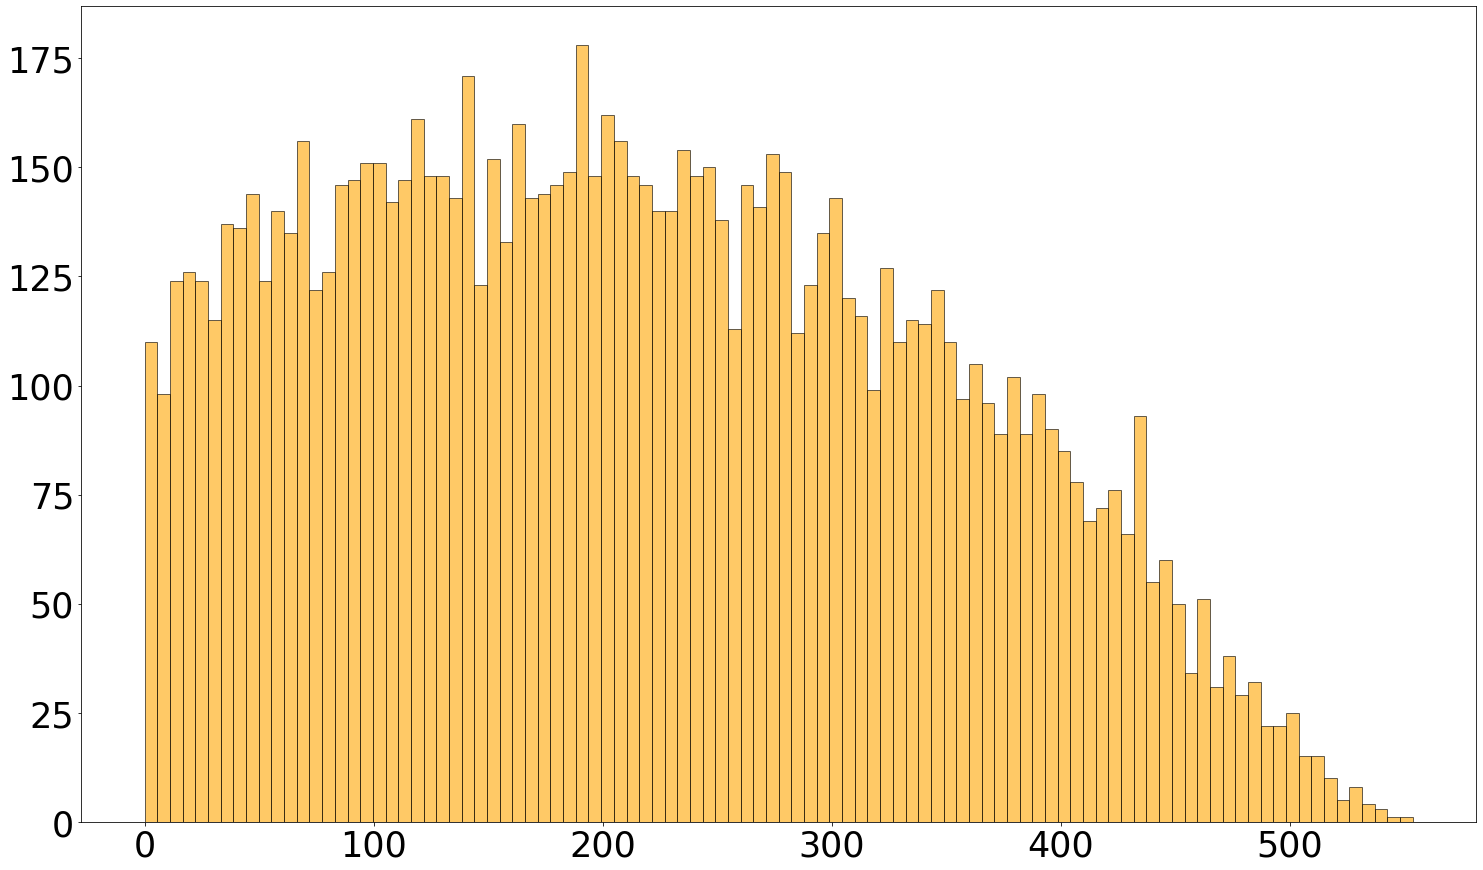

In [14]:
plt.hist(ar39_11k, bins=100, alpha=alpha, edgecolor='k', color='orange', label="Ar39")
plt.show()

In [15]:
muons[muons.energydeposition>0].groupby("creatorprocess").energydeposition.sum().sort_values()

creatorprocess
positronNuclear          4.281780e+01
muBrems                  6.412600e+01
nCapture                 4.052671e+02
dInelastic               2.129456e+03
electronNuclear          2.882908e+03
CoulombScat              2.702400e+04
muMinusCaptureAtRest     1.374826e+05
RadioactiveDecay         1.424514e+05
hBertiniCaptureAtRest    1.682966e+05
annihil                  2.712220e+05
kaon0LInelastic          5.187100e+05
Decay                    5.941050e+05
photonNuclear            8.378332e+05
hadElastic               1.013007e+06
hIoni                    1.035229e+06
eBrem                    1.793018e+06
muonNuclear              1.825535e+06
protonInelastic          3.376788e+06
pi+Inelastic             4.002669e+06
pi-Inelastic             4.120944e+06
neutronInelastic         5.090812e+06
phot                     4.375615e+07
muPairProd               7.748292e+07
eIoni                    2.215096e+08
muIoni                   4.083801e+08
compt                    4.674073e+

# See muon events wt small energy depositions

In [51]:
partial_muons_ids = muons_gb[muons_gb<1000].index
partial_muons_ids


Int64Index([    1,     8,    13,    48,    80,    86,    99,   126,   149,
              169,
            ...
            19893, 19912, 19914, 19942, 19956, 19966, 19976, 19981, 19984,
            19997],
           dtype='int64', name='eventnumber', length=2045)

In [57]:
marginal_muons = muons[(muons.eventnumber.isin(partial_muons_ids)) & (muons.time<1000) & (muons.energydeposition>0)]
print("Select {} events".format(marginal_muons.eventnumber.nunique()))
marginal_muons.sort_values("eventnumber")

Select 1926 events


,Unnamed: 0,Unnamed: 0.1,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,parentnucleusPID,OPs,OPcounter,energydetected
6745502,6745502,1719885,11,1048,7.25612,0.0,41.3947,-225.832,-47.0168,-677.442,-0.284682,0.672625,-0.683032,1,1612,compt,0,0.022,6.385386,0.159635
6745497,6745497,1719880,22,342,3.20630,0.0,41.5353,-190.522,-42.9105,-675.368,-0.281784,0.014032,-0.959375,1,1048,eBrem,0,0.032,4.104064,0.102602
6745498,6745498,1719881,11,1048,72.59730,0.0,41.5354,-190.510,-42.9287,-675.377,0.514911,-0.775481,-0.365372,1,1616,phot,0,0.032,92.924544,2.323114
6745499,6745499,1719882,11,1048,30.26600,0.0,41.5256,-189.696,-42.9507,-672.559,0.410979,0.164956,0.896597,1,1615,compt,0,0.032,38.740480,0.968512
6745500,6745500,1719883,11,1048,2.24176,0.0,41.5128,-191.565,-44.0473,-675.699,-0.332148,0.884270,-0.328243,1,1614,compt,0,0.032,2.869453,0.071736
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
659061,659061,659061,11,927,76.92080,0.0,35.2367,400.050,445.5640,699.057,-0.000482,0.996378,0.085030,19997,2508,phot,0,0.000,0.000000,0.000000
659060,659060,659060,22,282,3.20630,0.0,35.2366,400.050,445.5390,699.055,0.530704,0.761568,0.371977,19997,927,eBrem,0,0.000,0.000000,0.000000
659067,659067,659067,22,5783,3.20630,0.0,34.0014,364.967,465.5260,948.779,0.868252,-0.464963,-0.173053,19997,5790,eBrem,0,0.000,0.000000,0.000000
659068,659068,659068,11,5790,123.55500,0.0,34.0017,364.992,465.5250,948.832,0.430560,-0.022662,0.902277,19997,5816,phot,0,0.000,0.000000,0.000000


In [58]:
marginal_muons.groupby("eventnumber").PID.count().describe()

count    1926.000000
mean        6.834372
std         5.099130
min         1.000000
25%         3.000000
50%         6.000000
75%         9.000000
max        39.000000
Name: PID, dtype: float64